In [1]:
# https://www.tensorflow.org/tutorials/keras/basic_classification
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

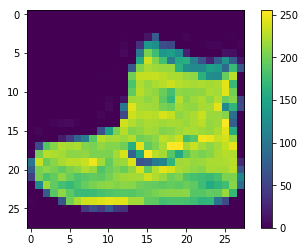

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
# plt.grid(False)
plt.show()

In [6]:
train_images =train_images/255.0
test_images = test_images/255.0

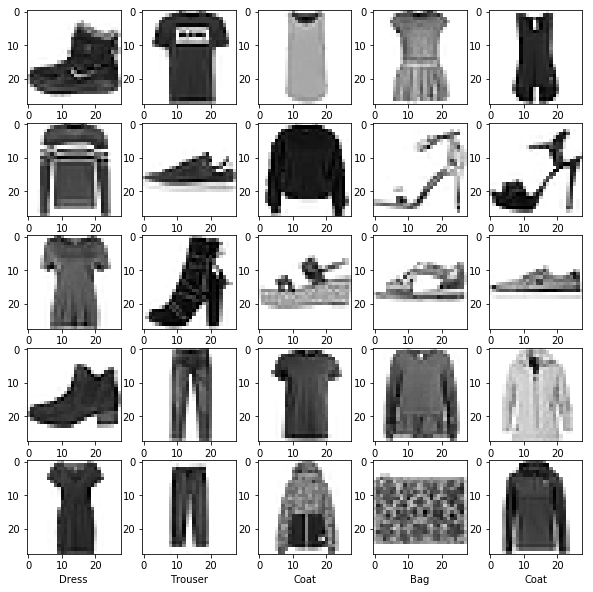

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5,i+1)
	# plt.xticks()
	# plt.yticks()
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build a Model 

### Setup the Layers

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the Model

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

## Train the Model

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 27s 453us/sample - loss: 0.4976 - accuracy: 0.8255
Epoch 2/5
60000/60000 [==============================] - 13s 222us/sample - loss: 0.3701 - accuracy: 0.8674
Epoch 3/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.3352 - accuracy: 0.8772
Epoch 4/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3093 - accuracy: 0.8856
Epoch 5/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2934 - accuracy: 0.8926


##  Evaluate Accuracy

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy: ",test_acc)

10000/10000 [==============================] - 2s 153us/sample - loss: 0.3436 - accuracy: 0.8772
Accuracy:  0.8772


## Make Predictions

In [23]:
predictions = model.predict(test_images)

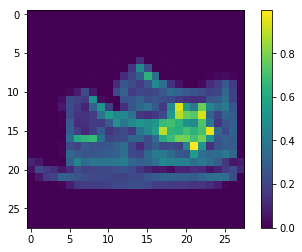

Sandal


In [31]:
# Check the Predictions
plt.figure()
plt.imshow(test_images[9999])
plt.colorbar()
# plt.grid(False)
plt.show()
print(class_names[np.argmax(predictions[9999])])

In [46]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


    

In [47]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

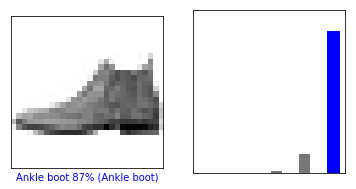

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

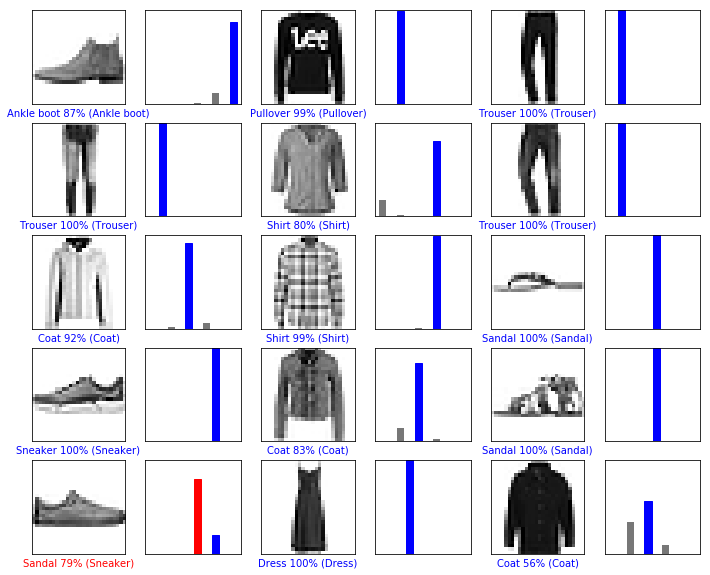

In [54]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()